In [1]:
C1 = C2 = D1 = D2 = 1.0 # こういう記法が許されるのが、Julia の地味にいいところ．
u0 = v0 = 0.7
Δt = 0.05
 
function euler(u,v)
    u_new = (1 + Δt*D1 - Δt*C1*v) * u
    v_new = (1 - Δt*D2 + Δt*C2*u) * v
    u,v = u_new, v_new
    return u, v
end

euler (generic function with 1 method)

In [2]:
u,v = u0, v0
uv_sq = [ u0, v0 ]

for i in 1:500
    u,v = euler(u,v) # これで時間発展させて、
    uv_sq = hcat(uv_sq, [u,v]) # あとでグラフを描くために、データを配列に追加して録っておく
end

In [3]:
uv_sq

2×501 Array{Float64,2}:
 0.7  0.7105  0.721531  0.733092  0.745186  …  0.353772  0.353133  0.353086
 0.7  0.6895  0.679519  0.670058  0.661116     1.03614   1.00266   0.970234

In [4]:
using Plots
gr() # Plots/gr を使う準備をして…

Plots.GRBackend()

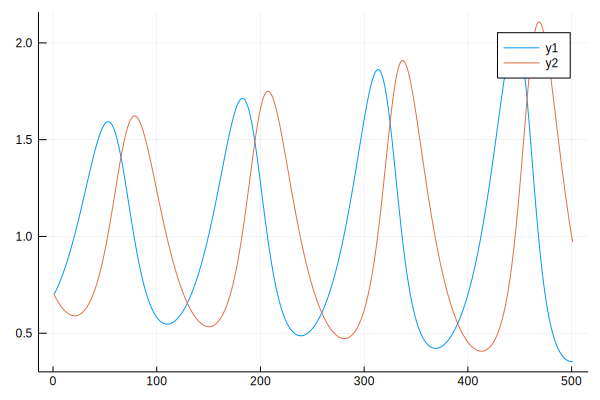

In [5]:
plot(uv_sq') 
# 行列を与えると、縦ベクトルを別々のグラフとして描いてくれる．ちなみに,' で行列を転置している.

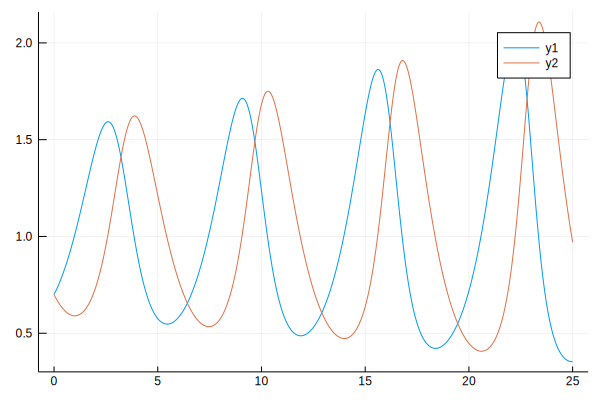

In [6]:
t_sq = [0:Δt:500*Δt]
plot(t_sq, uv_sq')

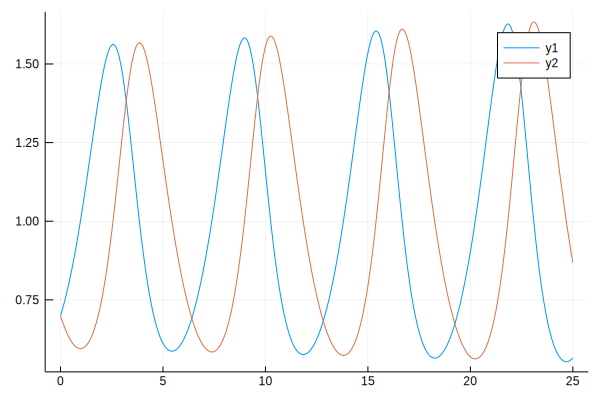

In [7]:
Δt = 0.01
lastT = 25
N = Int(lastT/Δt)

u,v = u0, v0
uv_sq = [ u0, v0 ]

for i in 1:N
    u,v = euler(u,v)
    uv_sq = hcat(uv_sq, [u,v])
end

t_sq = 0:Δt:lastT
plot(t_sq, uv_sq')
